In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [2]:
def tf_reset():
    try:
        sess.close()
    except:
        pass
    tf.reset_default_graph()
    return tf.Session()

In [3]:
# create the session you'll work in
# you can think of this as a "blank piece of paper" that you'll be writing math on
sess = tf_reset()

# define your inputs
a = tf.constant(1.0)
b = tf.constant(2.0)

# do some operations
c = a + b

# get the result
c_run = sess.run(c)

print('c = {0}'.format(c_run))

c = 3.0


### What is happening?
* I have passed variables in odd fashion. 

In [4]:
sess = tf_reset()

a = tf.placeholder(dtype=tf.float32, shape=[1, 2], name='a_placeholder')
b = tf.placeholder(dtype=tf.float32, shape=[1, 2]) # , name='b_placeholder'

c = a + b

feed1 = np.random.uniform(1, -1, (1, 2))
feed2 = np.random.normal(0, 1, (1, 2))

c1_run = sess.run(c, feed_dict={a: [[1/2, 1]], b: [[9.89, 2.090]]})
c2_run = sess.run(c, feed_dict={a: feed1, b: feed2})
print('c1 = {}'.format(c1_run))
print('c2 = {0}'.format(c2_run))

c1 = [[10.39  3.09]]
c2 = [[-0.7550663  -0.18605018]]


### What is happening?
* tf_reset(): starts tensorflow new session, it is a function defined by me it is not **tensorflow** function.
* tf.placeholder: tensorflow func, defines the variable with data type, shape, and name. This info helps when we print it.
* 'c = a + b: it tells what operations to do on variables a and b. You can directly write it in the sess.run(.) by replacing c.
* sess_run: runs the session and does the operations specified by the user. Values are fed using dictionary. Value **given out by it** is a **numpy array**.
* printing the variable 'a', 'b' gives you the variable info.
* .format() is just a in-built python print function.

In [5]:
sess = tf_reset()

a = tf.placeholder(dtype=tf.float32, shape=[None, None], name='a_placeholder')
b = tf.placeholder(dtype=tf.float32, shape=[None, None], name='b_placeholder')

c = a + b

c_run = sess.run(c, feed_dict={a: [[12, 12]], b: [[23, 43]]})
print('a:', a)
print('a shape = {}'.format(a.get_shape()))
print('b:', b)
print('b shape = {}'.format(b.get_shape()))
print('c = {}'.format(c_run))

a: Tensor("a_placeholder:0", shape=(?, ?), dtype=float32)
a shape = (?, ?)
b: Tensor("b_placeholder:0", shape=(?, ?), dtype=float32)
b shape = (?, ?)
c = [[35. 55.]]


### What is happening?
* sess_run: here we see how to run the sess and compute the params. Here we are not performing any operations but just passing and printing it out.
* Even though the data type is defined to be float32, but I passed integers.

In [6]:
sess = tf_reset()

a = tf.constant([[1, 2, 3]], dtype=tf.float32)
b = tf.constant([[1], [2], [3]], dtype=tf.float32)

a_run, b_run = sess.run([a, b])
print('a: \n', a)
print('b: \n', b)
print('a_run: \n', a_run)
print('b_run: \n', b_run)

a: 
 Tensor("Const:0", shape=(1, 3), dtype=float32)
b: 
 Tensor("Const_1:0", shape=(3, 1), dtype=float32)
a_run: 
 [[1. 2. 3.]]
b_run: 
 [[1.]
 [2.]
 [3.]]


In [7]:
c = b + b

c_run = sess.run(c) # since a, b are constants you don't feed values to it
print('b:\n{0}'.format(b_run))
print('c:\n{0}'.format(c_run))

b:
[[1.]
 [2.]
 [3.]]
c:
[[2.]
 [4.]
 [6.]]


### What is happening?
* You need to check dimensions of the tensors before feeding. Otherwise you end up getting this. Same issue when using numpy array.

In [8]:
c = a + b
c_run = sess.run(c)
print('a_run: \n', a_run)
print('b_run: \n', b_run)
print('c_run: \n', c_run)

a_run: 
 [[1. 2. 3.]]
b_run: 
 [[1.]
 [2.]
 [3.]]
c_run: 
 [[2. 3. 4.]
 [3. 4. 5.]
 [4. 5. 6.]]


### What is happening?
* Showing how to do element-wise computation and matrix multiplication.
* We can also see how to do multiple computation in one session. 

In [9]:
c_element_wise = a * b
c_matrix = tf.matmul(a, b)

c_run1, c_run2 = sess.run([c_element_wise, c_matrix])
print('Element-wise/Component-wise: \n', c_run1)
print('Matrix multiplication: \n', c_run2)

Element-wise/Component-wise: 
 [[1. 2. 3.]
 [2. 4. 6.]
 [3. 6. 9.]]
Matrix multiplication: 
 [[14.]]


### What is happening?
* Showing how to do chained computations.

In [10]:
c0 = b + b
c1 = c0 + 1

c0_run, c1_run = sess.run([c0, c1])
print('c0: \n', c0_run)
print('c1: \n', c1_run)

c0: 
 [[2.]
 [4.]
 [6.]]
c1: 
 [[3.]
 [5.]
 [7.]]


### What is happening?
* There are many more in-built functions similar to numpy to compute mean,..., etc.

In [11]:
c = tf.reduce_mean(b)

c_run = sess.run(c)
print('b_run: \n', b_run)
print('Mean of b_run: \n', c_run)

b_run: 
 [[1.]
 [2.]
 [3.]]
Mean of b_run: 
 2.0


### What is happening?
Now that we can input data and perform computations, we want some of these operations to involve variables that are free parameters, and can be trained using an optimizer (e.g., gradient descent).

 **Note:** Tensor flow in-built functions have many aliases for the same function. Don't get confused. All of the them will work.

Definitions of some important function:
* tf.get_variable: creates a tensorflow variable. Gets an existing variable with these parameters or create a new one.
* tf.constant_initializer: Initializer that generates tensors with constant values.
* tf.global_variables: Returns global variables. Global variables are variables that are shared across machines in a distributed environment. The Variable() constructor or get_variable() automatically adds new variables to the graph collection GraphKeys.GLOBAL_VARIABLES. This convenience function returns the contents of that collection.
* tf.global_variables_initializer: initializes global variables in the graph. This is just a shortcut for variables_initializer(global_variables())

Flow of the code
* First I have created some variables to do computations. Then created a new variable and and check that it's been added to Tensorflow's variables list. We can do operations with the variable just like any other tensor. Before we can run any of these operations, we must first initalize the variables and then we can run the operations just as we normally would.

In [12]:
sess = tf_reset()

b = tf.constant([[1., 2., 3.]], dtype=tf.float32)

b_run = sess.run(b)
print('b_run: \n', b_run)

b_run: 
 [[1. 2. 3.]]


In [13]:
var_init_value = [[2.0, 4.0, 6.0]]
var = tf.get_variable(name='myvar', shape=[1, 3], dtype=tf.float32, initializer=tf.constant_initializer(var_init_value))
# you can't rerun this cell because when in same tf session re-creation of the variable 'var' is not allowed.

In [14]:
print(var)
print(tf.global_variables())

<tf.Variable 'myvar:0' shape=(1, 3) dtype=float32_ref>
[<tf.Variable 'myvar:0' shape=(1, 3) dtype=float32_ref>]


In [15]:
c = b + var
print('b: \n', b)
print('var: \n', var)
print('c: \n', c)

b: 
 Tensor("Const:0", shape=(1, 3), dtype=float32)
var: 
 <tf.Variable 'myvar:0' shape=(1, 3) dtype=float32_ref>
c: 
 Tensor("add:0", shape=(1, 3), dtype=float32)


In [16]:
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [17]:
c_run = sess.run(c)

print('b_run: \n', b_run)
print('var_init_value: \n', var_init_value)
print('c_run: \n', c_run)

b_run: 
 [[1. 2. 3.]]
var_init_value: 
 [[2.0, 4.0, 6.0]]
c_run: 
 [[3. 6. 9.]]


### What is happening?
### How to train a neural network for a simple regression problem?
We've discussed how to input data, perform operations, and create variables. We'll now show how to combine all of these **with some minor additions** to train a neural network on a simple regression problem.
* First, we'll create data for a 1-dimensional regression problem.
* The below code creates the inputs, variables, neural network operations, mean-squared-error loss, gradient descent optimizer, and runs the optimizer using minibatches of the data.
* Now that the neural network is trained, we can use it to make predictions.

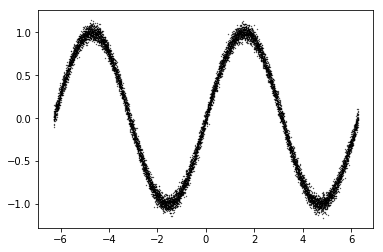

In [18]:
# generate the data
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])

plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.show()

In [22]:
sess = tf_reset()

# NN model
def create_model():
    # Inputs and Outputs
    input_layer = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    output_layer = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    
    # Create Weights
    W0 = tf.get_variable(name='W0', shape=[1, 20], initializer=tf.contrib.layers.xavier_initializer())
    W1 = tf.get_variable(name='W1', shape=[20, 20], initializer=tf.contrib.layers.xavier_initializer())
    W2 = tf.get_variable(name='W2', shape=[20, 1], initializer=tf.contrib.layers.xavier_initializer())
    
    # Bias
    b0 = tf.get_variable(name='b0', shape=[20], initializer=tf.constant_initializer(0.0))
    b1 = tf.get_variable(name='b1', shape=[20], initializer=tf.constant_initializer(0.0))
    b2 = tf.get_variable(name='b2', shape=[1], initializer=tf.constant_initializer(0.0))
    
    # List of all the variables
    weights = [W0, W1, W2]
    bias = [b0, b1, b2]
    activations = [tf.nn.relu, tf.nn.relu, None]
    
    # Forward Pass or create computation graph
    layer = input_layer
    for W, b, phi in zip(weights, bias, activations):
        layer = tf.matmul(layer, W) + b
        if phi is not None:
            layer = phi(layer)
    
    output_pred = layer
    
    return input_layer, output_layer, output_pred

input_layer, output_layer, output_pred = create_model()

# Loss
mse = tf.reduce_mean(0.5 * tf.square(output_pred - output_layer))

# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

# Initialize the variables
sess.run(tf.global_variables_initializer())

# Create saver to save model variables
saver = tf.train.Saver()

# Run training
batch_size = 32
for training_step in range(10000):
    # get a random subset of the training data
    indices = np.random.randint(low=0, high=len(inputs), size=batch_size)
    input_batch = inputs[indices]
    output_batch = outputs[indices]
    
    # run the optimizer and get the mse
    _, mse_run = sess.run([opt, mse], feed_dict={input_layer: input_batch, output_layer: output_batch})
    
    # print the mse every so often
    if training_step % 1000 == 0:
        print('{0:04d} mse: {1:.3f}'.format(training_step, mse_run))
        saver.save(sess, '/tmp/model.ckpt')

0000 mse: 0.433
1000 mse: 0.038
2000 mse: 0.015
3000 mse: 0.021
4000 mse: 0.008
5000 mse: 0.006
6000 mse: 0.002
7000 mse: 0.002
8000 mse: 0.001
9000 mse: 0.002


INFO:tensorflow:Restoring parameters from /tmp/model.ckpt


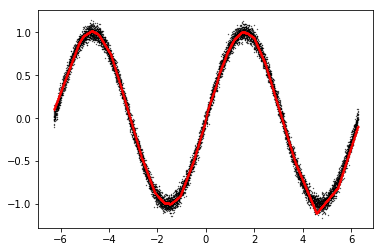

In [24]:
sess = tf_reset()

# Create the model
input_layer, output_layer, output_pred = create_model()

# Restore the model 
saver = tf.train.Saver()
saver.restore(sess, "/tmp/model.ckpt")

output_pred_run = sess.run(output_pred, feed_dict={input_layer: inputs})

plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], output_pred_run[:, 0], c='r', marker='o', s=0.1)
plt.show()